<a href="https://colab.research.google.com/github/SalmanEunus27/Adil-test/blob/master/bangla_news_article_classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [1]:
{"username":"Your username","key":"2f4997fa1d8e4f56ad8eb7659aaf1c31"}

{'key': '2f4997fa1d8e4f56ad8eb7659aaf1c31', 'username': 'Your username'}

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gakowsher/banglamct7-bangla-multiclass-text-dataset-7-tags

banglamct7-bangla-multiclass-text-dataset-7-tags.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
with zipfile.ZipFile("/content/banglamct7-bangla-multiclass-text-dataset-7-tags.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/sample_data")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
bangla_train = pd.read_csv("/content/sample_data/BanglaMCT7/train.csv")
bangla_test = pd.read_csv("/content/sample_data/BanglaMCT7/test.csv")

In [8]:
bangla_train.head(20)

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,sports,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...
5,technology,খুদে ব্লগ লেখার জনপ্রিয় সাইট টুইটার এখন বাংলা ...,খুদে ব্লগ লেখার জনপ্রিয় সাইট ...
6,entertainment,মুক্তির প্রথম দিনেই অক্ষয় কুমার অভিনীত ‘কেশরি’...,মুক্তির প্রথম দিনেই অক্ষয় কুমার ...
7,entertainment,আজমেরী আশা ও পিয়া বিপাশা দুজনে সম্পর্কে বোন। ব...,আজমেরী আশা পিয়া বিপাশা দুজনে ...
8,international,ভেনেজুয়েলার সুপ্রিম কোর্টের বিচারপতি ক্রিস্টিয়...,ভেনেজুয়েলার সুপ্রিম কোর্টের বিচারপত...
9,education,"বহুনির্বাচনি প্রশ্নোত্তরপ্রিয় পরীক্ষার্থী, আজ ...",বহুনির্বাচনি প্রশ্নোত্তরপ্রিয় পরীক্ষার...


In [9]:
bangla_train.tail(-20)

,category,text,cleanText
20,state,রাজধানীর মিরপুরের ১৩ নম্বর সেকশনে শ্যামলপল্লি ...,রাজধানীর মিরপুরের নম্বর সেকশনে শ...
21,technology,তথ্যপ্রযুক্তির ব্যবহার বাড়ছে দ্রুত। দেশের বিভি...,তথ্যপ্রযুক্তির বাড়ছে দ্রুত দেশের ...
22,education,হোটেল ও পর্যটনশিল্পে প্রতিষ্ঠিত হওয়ার জন্য প্...,হোটেল পর্যটনশিল্পে প্রতিষ্ঠিত প্রাত...
23,international,উত্তর কোরিয়া আরও ক্ষেপণাস্ত্র উৎক্ষেপণের প্রস্...,উত্তর কোরিয়া ক্ষেপণাস্ত্র উৎক্ষেপণে...
24,state,এবারের পবিত্র ঈদুল ফিতর কাটতে পারে শ্রাবণের বর...,এবারের পবিত্র ঈদুল ফিতর কাটতে ...
...,...,...,...
98878,education,সহকারী অধ্যাপক টিচার্স ট্রেনিং কলেজ (মহিলা)...,সহকারী অধ্যাপক টিচার্স ট্রেনিং ক...
98879,entertainment,অক্টোবরের ১১ তারিখে ৭৫ বছর পূর্ণ করবেন অমিতাভ ...,অক্টোবরের তারিখে বছর পূর্ণ অমিতা...
98880,technology,কাজী নাঈম আল রশিদ। সফটওয়্যার প্রকৌশলী। কাজ করে...,কাজী নাঈম রশিদ সফটওয়্যার প্রকৌশল...
98881,technology,ইয়াহুকে মার্কিন টেলিকম প্রতিষ্ঠান ভেরাইজন কিনে...,ইয়াহুকে মার্কিন টেলিকম প্রতিষ্ঠান ...


In [10]:
print(bangla_train.cleanText[100])

  হলিউডের    অস্কারজয়ী    ছবি    দ্য    রেভেন্যান্ট    অনুপ্রাণিত    অ্যাকশন    দৃশ্য    তৈরি    সাড়াজাগানো    পৌরাণিক    কাহিনিনির্ভর    ভারতীয়    ছবি    বাহুবলি    সিক্যুয়াল    বাহুবলি    দুই    ছবির    বছর    দারুণ    জনপ্রিয়    ব্যবসাসফল    বাহুবলি    ছবিটি    সিকুয়াল    ফিরছে    নতুন    ছবি    বাহুবলি    দুই    ঐতিহাসিক    কাহিনিনির্ভর    ছবিই    বেশি    প্রতিবেদনে    অনলাইন    সংবাদমাধ্যম    ডিএনএ    ছবিতে    থাকছে    এবারের    অস্কারজয়ী    ছবি    দ্য    রেভেন্যান্ট    ছোঁয়া    দ্য    রেভেন্যান্ট    ছবিতে    দারুণ    অভিনয়    বছরের    সাধনায়    অস্কার    খরা    ঘুচিয়েছেন    হলিউডের    তারকা    লিওনার্দো    ডিক্যাপ্রিও    আলেহান্দ্রো    গঞ্জালেস    ইনারিতু    পরিচালিত    ছবিটি    সেরা    পরিচালকসহ    অস্কার    জিতেছে    তিনটি    বিভাগে    বাহুবলি    দুই    ছবির    অ্যাকশন    দৃশ্যে    অস্কারজয়ী    দ্য    রেভেন্যান্ট    ছবির    দৃশ্যের    অনুপ্রাণিত    দৃশ্যায়ন    পরিচালক    এসএস    রাজামৌলির    বাহুবলি    দুই    ছবিটি    পরিকল্পনা    বলেও    বাহুবলি    দুই    ছবিতে    থাকছে    বিস

In [11]:
bangla_test.head(20)

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...
5,economy,সাউথ বাংলা এগ্রিকালচার অ্যান্ড কমার্স (এসবিএসি...,সাউথ বাংলা এগ্রিকালচার অ্যান্ড ক...
6,entertainment,কিছুদিন ধরেই বলিউডের বাতাসে ভেসে বেড়াচ্ছে আরবা...,কিছুদিন ধরেই বলিউডের বাতাসে ভেসে...
7,sports,দুটি ইতিহাসের শেষ লাইন লেখা হলো তাঁর হাতে। গত ...,ইতিহাসের শেষ লাইন লেখা হাতে অ...
8,sports,চেচনিয়ার নেতা রমজান কাদিরভের বিরুদ্ধে মানবাধিক...,চেচনিয়ার নেতা রমজান কাদিরভের বির...
9,entertainment,শুরু হচ্ছে ঢাকা আন্তর্জাতিক চলচ্চিত্র উৎসব। ১২...,শুরু ঢাকা আন্তর্জাতিক চলচ্চিত্র ...


In [12]:
bangla_test.tail(-20)

,category,text,cleanText
20,international,সৌদি আরবে পৌর নির্বাচনে প্রথমবার এক নারী কাউন্...,সৌদি আরবে পৌর নির্বাচনে প্রথমবার...
21,sports,রাঁচিতেও সেঞ্চুরি করেছেন কোহলি। অধিনায়কের সেঞ্...,রাঁচিতেও সেঞ্চুরি কোহলি অধিনায়কের ...
22,state,বরিশালের সদর উপজেলার তালুকদার হাট স্কুল ও কলেজ...,বরিশালের সদর উপজেলার তালুকদার হা...
23,technology,তুলনামূলকভাবে বেশি দামের কারণে চীনের বাজারে আই...,তুলনামূলকভাবে বেশি দামের কারণে চ...
24,state,ভবিষ্যতে বাংলাদেশের সাইবার নিরাপত্তার কথা মাথা...,ভবিষ্যতে বাংলাদেশের সাইবার নিরাপত্ত...
...,...,...,...
98879,sports,১৯৫৯ সালে ইউরোপিয়ান ক্লাব কাপে জাতীয় দল পাঠান...,সালে ইউরোপিয়ান ক্লাব কাপে জাতীয়...
98880,entertainment,গানের দল সহজিয়ার প্রথম অ্যালবাম ‘রঙমিস্ত্রী’র ...,গানের সহজিয়ার প্রথম অ্যালবাম রঙম...
98881,international,ফেসবুকের ৮১ হাজার ব্যবহারকারীর তথ্য চুরি করে স...,ফেসবুকের হাজার ব্যবহারকারীর তথ্য ...
98882,economy,পেট্রোল পাম্পে তেল বা সিএনজির বিল বিকাশের মাধ...,পেট্রোল পাম্পে তেল সিএনজির বিল ...


In [13]:
bangla_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98883 entries, 0 to 98882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   98883 non-null  object
 1   text       98883 non-null  object
 2   cleanText  98883 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [14]:
bangla_train.describe()

,category,text,cleanText
count,98883,98883,98883
unique,7,98425,97926
top,sports,"প্রিয় শিক্ষার্থী বন্ধুরা, তোমাদের হাতে আঁকা র...",প্রিয় শিক্ষার্থী বন্ধুরা তোমাদের ...
freq,15672,25,25


In [15]:
bangla_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98884 entries, 0 to 98883
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   98884 non-null  object
 1   text       98884 non-null  object
 2   cleanText  98884 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [16]:
bangla_test.describe()

,category,text,cleanText
count,98884,98884,98884
unique,7,98384,97880
top,sports,"প্রিয় শিক্ষার্থী বন্ধুরা, তোমাদের হাতে আঁকা র...",প্রিয় শিক্ষার্থী বন্ধুরা তোমাদের ...
freq,15883,30,31


In [17]:
bangla_train.isnull().sum()

category     0
text         0
cleanText    0
dtype: int64

In [18]:
bangla_test.isnull().sum()

category     0
text         0
cleanText    0
dtype: int64

In [19]:
bangla_train['category'].value_counts()

sports           15672
international    15540
state            15362
entertainment    15198
economy          14430
education        12674
technology       10007
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


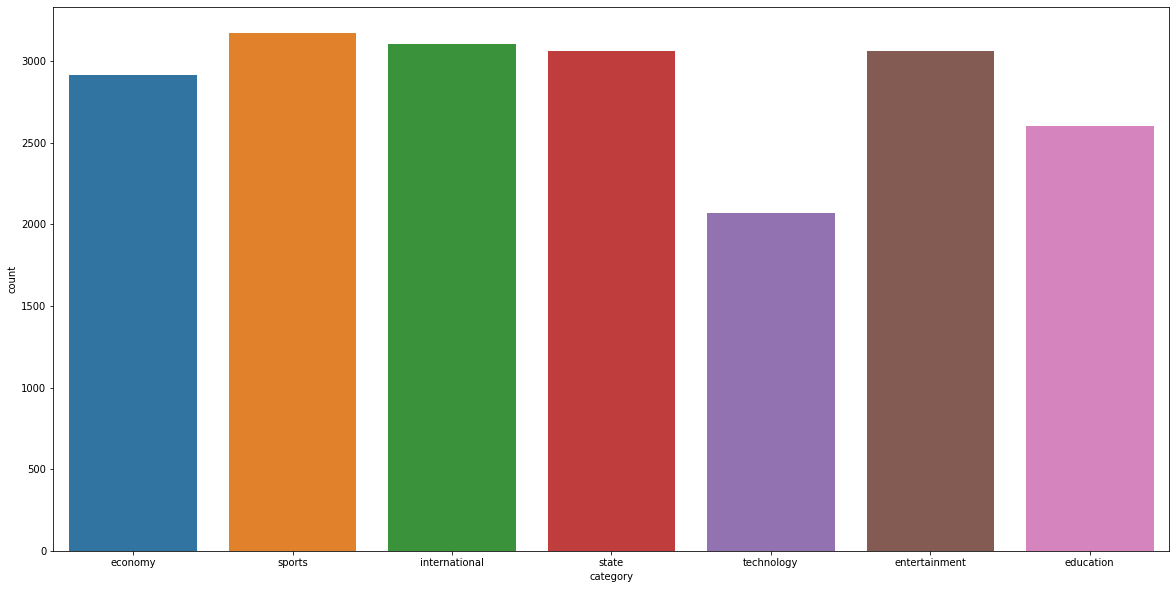

In [20]:
plt.figure(figsize=(20,10))
plot = bangla_train[0:20000]
sns.countplot(plot.category)

# Data preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bangla_train.category = encoder.fit_transform(bangla_train['category'])
bangla_test.category = encoder.fit_transform(bangla_test['category'])

In [22]:
bangla_train.head(10)

,category,text,cleanText
0,0,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,4,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,3,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,5,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,4,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...
5,6,খুদে ব্লগ লেখার জনপ্রিয় সাইট টুইটার এখন বাংলা ...,খুদে ব্লগ লেখার জনপ্রিয় সাইট ...
6,2,মুক্তির প্রথম দিনেই অক্ষয় কুমার অভিনীত ‘কেশরি’...,মুক্তির প্রথম দিনেই অক্ষয় কুমার ...
7,2,আজমেরী আশা ও পিয়া বিপাশা দুজনে সম্পর্কে বোন। ব...,আজমেরী আশা পিয়া বিপাশা দুজনে ...
8,3,ভেনেজুয়েলার সুপ্রিম কোর্টের বিচারপতি ক্রিস্টিয়...,ভেনেজুয়েলার সুপ্রিম কোর্টের বিচারপত...
9,1,"বহুনির্বাচনি প্রশ্নোত্তরপ্রিয় পরীক্ষার্থী, আজ ...",বহুনির্বাচনি প্রশ্নোত্তরপ্রিয় পরীক্ষার...


In [23]:
max(bangla_train.category)

6

In [24]:
bangla_test.head(10)

,category,text,cleanText
0,1,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,4,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,3,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,3,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,6,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...
5,0,সাউথ বাংলা এগ্রিকালচার অ্যান্ড কমার্স (এসবিএসি...,সাউথ বাংলা এগ্রিকালচার অ্যান্ড ক...
6,2,কিছুদিন ধরেই বলিউডের বাতাসে ভেসে বেড়াচ্ছে আরবা...,কিছুদিন ধরেই বলিউডের বাতাসে ভেসে...
7,4,দুটি ইতিহাসের শেষ লাইন লেখা হলো তাঁর হাতে। গত ...,ইতিহাসের শেষ লাইন লেখা হাতে অ...
8,4,চেচনিয়ার নেতা রমজান কাদিরভের বিরুদ্ধে মানবাধিক...,চেচনিয়ার নেতা রমজান কাদিরভের বির...
9,2,শুরু হচ্ছে ঢাকা আন্তর্জাতিক চলচ্চিত্র উৎসব। ১২...,শুরু ঢাকা আন্তর্জাতিক চলচ্চিত্র ...


In [25]:
bangla_train_x=bangla_train.cleanText[0:20000]
bangla_test_x=bangla_test.cleanText[0:20000]
bangla_train_y=bangla_train.category[0:20000]
bangla_test_y=bangla_test.category[0:20000]

In [26]:
bangla_train_x.head()

0      বাংলাদেশে    সফররত    বিশ্ব    বাণিজ্য    সং...
1      ইউরোপিয়ান    ফুটবলে    বয়ে    একদিকে    সংবা...
2      বিজেপির    নেতৃত্বে    ভারতের    উত্তর    প্...
3      নারায়ণগঞ্জের    সোনারগাঁ    উপজেলার    সরকা...
4      ছাই    ছাই    ধুলো    ধুলো    আধ্যাত্মিক    ...
Name: cleanText, dtype: object

In [27]:
bangla_train_y.head()

0    0
1    4
2    3
3    5
4    4
Name: category, dtype: int64

In [28]:
print("type of text_train: {}".format(type(bangla_train_x)))
print("length of text_train: {}".format(len(bangla_train_x)))
print("text_train[1]:\n{}".format(bangla_train_x[2]))

type of text_train: <class 'pandas.core.series.Series'>
length of text_train: 20000
text_train[1]:
  বিজেপির    নেতৃত্বে    ভারতের    উত্তর    প্রদেশ    শুরু    বিভিন্ন    ঐতিহাসিক    স্থানের    নাম    বদলের    ঝাপটা    পশ্চিমবঙ্গে    লেগেছে    পশ্চিমবঙ্গের    উত্তর    দিনাজপুরের    ইসলামপুরের    নাম    ঈশ্বরপুর    রাখার    উদ্যোগ    নিয়েছে    বিশ্ব    হিন্দু    পরিষদ    ভিএইচপি    ইসলামপুরে    ভিএইচপি    পরিচালিত    সরস্বতী    শিশু    মন্দির    বিদ্যামন্দির    স্কুলের    সাইনবোর্ডে    ইতিমধ্যে    ইসলামপুরের    ঈশ্বরপুর    লেখা    এভাবে    নাম    বদল    এলাকায়    ঘোলা    শুরু    হুট    বিদ্যালয়ের    সাইনবোর্ডে    কীভাবে    ইসলামপুরের    স্থলে    ঈশ্বরপুর    লেখা    প্রশ্ন    উঠেছে    রাজ্যের    শিক্ষামন্ত্রী    পার্থ    চট্টোপাধ্যায়    বিষয়টি    তদন্ত    বিশ্ব    হিন্দু    পরিষদের    পূর্ব    ভারতের    সংগঠন    সম্পাদক    শচীন্দ্রনাথ    সিং    মুসলিম    শাসকেরা    নাম    চাপিয়ে    দিয়েছিল    ঐতিহাসিকভাবে    জায়গার    নাম    ঈশ্বরপুর    স্কুলের    সাইনবোর্ডে    ঈশ্বরপুর    লেখা    ইতিহা

**We will now represent the text as a bag of words**

In [29]:
#count vectorizer does tokenization and vocabulary building
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(bangla_train_x)
#built-in transform method transforms the vector into bag-of-words-representation
bangla_train_X = vect.transform(bangla_train_x)
print("X_train:\n{}".format(repr(bangla_train_X)))

X_train:
<20000x15547 sparse matrix of type '<class 'numpy.int64'>'
	with 1457348 stored elements in Compressed Sparse Row format>


In [30]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 15547
Vocabulary content:
 {'সফররত': 14397, 'ডব': 7317, 'উট': 2423, 'মহ': 11537, 'পর': 9800, 'লক': 12999, 'এইচইএম': 2916, 'রব': 12564, 'আজ': 830, 'জন': 6254, 'তই': 7575, 'তর': 7839, 'রফত': 12555, 'ওয়': 4275, 'ষয়ট': 14075, 'ইস': 2163, 'সম': 14464, 'সহজ': 14651, 'ভব': 10919, 'চলত': 5945, 'বছর': 10267, 'বপ': 10492, 'নট': 9009, 'কস': 4848, 'লস': 13380, 'অর': 303, 'অগ': 34, 'রগত': 12180, 'শক': 13510, 'তব': 7774, 'য়ন': 15359, 'বল': 10638, 'নত': 9040, 'শগ': 13548, 'এলড': 3776, 'মঙ': 11176, 'গলব': 5481, 'জধ': 6251, 'রগ': 12175, 'এমইএ': 3544, 'আয়': 1374, 'মধ': 11296, 'যহ': 11912, 'নভ': 9195, 'সভ': 14452, 'আল': 1215, 'চক': 5719, 'বক': 10201, 'এসব': 3959, 'কথ': 4504, 'ওর': 4215, 'অন': 111, 'রধ': 12473, 'অত': 81, 'যমন': 11851, 'আহম': 1342, 'এমইএর': 3551, 'পত': 9629, 'শহ': 13787, 'সঞ': 14241, 'লন': 13195, 'এফব': 3493, 'আই': 410, 'আকর': 763, 'উদ': 2490, 'সচ': 14219, 'হব': 14908, 'হজ': 14812, 'আত': 904, 'ইসল': 2194, 'রপ': 12514, 'মদ': 11272, 'রম': 12627, 'উপস': 2607, 'আসছ': 1289, 'থন

In [31]:
print("Dense representation of bag_of_words:\n{}".format(
bangla_train_X.toarray()))

Dense representation of bag_of_words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
#print("Vocabulary size: {}".format(len(vect.vocabulary_)))
#print("Vocabulary content:\n {}".format(vect.vocabulary_))

In [33]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[10020:10040]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 15547
First 20 features:
['ªস', '¾¾¾¾¾¾', '¾¾¾¾¾¾¾', '¾¾¾¾¾¾¾¾¾¾¾¾¾', 'èসঠ', 'íক', 'ðম', 'œষ', 'অঅবহ', 'অইঈ', 'অইগ', 'অইছ', 'অইড', 'অইব', 'অইয়', 'অউঐ', 'অউক', 'অউচ', 'অউটস', 'অউর']
Features 20010 to 20030:
['ফবর', 'ফবল', 'ফভ', 'ফভল', 'ফম', 'ফয', 'ফর', 'ফরআম', 'ফরই', 'ফরউদ', 'ফরউল', 'ফরএভ', 'ফরও', 'ফরওয', 'ফরওয়', 'ফরক', 'ফরকল', 'ফরগ', 'ফরচ', 'ফরজ']
Every 2000th feature:
['ªস', 'ইভজ', 'ঐসব', 'চয়জ', 'থও', 'ফতথ', 'রআরট', 'ষন']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Let's try to train now using logistic regression**

In [34]:
!pip install scikit-learn  -U
!pip install delayed

In [35]:
#import delayed
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(solver='liblinear'), bangla_train_X, bangla_train_y, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Mean cross-validation accuracy: 0.86


**Now we will tune the regularization parameter 'C' of logistic regression to check if it increases the accuracy.**

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(bangla_train_X, bangla_train_y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number

Best cross-validation score: 0.87
Best parameters:  {'C': 0.1}


In [37]:
#count vectorizer does tokenization and vocabulary building
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer().fit(bangla_test_x)
#built-in transform method transforms the vector into bag-of-words-representation
bangla_test_X = vect.transform(bangla_test_x)
print("X_test:\n{}".format(repr(bangla_test_X)))

X_test:
<20000x15547 sparse matrix of type '<class 'numpy.int64'>'
	with 1454019 stored elements in Compressed Sparse Row format>


**We might get uninformative features still due to choosing wrong tokens. So we will now ue only those tokens which appear on atleast 5 documents, to make sure that they are the correct tokens which is specified by the min_df parameter**

In [38]:
vect = CountVectorizer(min_df=5).fit(bangla_train_x)
X_train = vect.transform(bangla_train_x)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <20000x5538 sparse matrix of type '<class 'numpy.int64'>'
	with 1441595 stored elements in Compressed Sparse Row format>


In [39]:
feature_names = vect.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[10010:10030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['íক', 'অউর', 'অক', 'অকট', 'অকথ', 'অকপট', 'অকর', 'অকল', 'অকস', 'অখ', 'অখণ', 'অগ', 'অগণ', 'অগণত', 'অগত', 'অগভ', 'অগম', 'অঘ', 'অঘটন', 'অঘটনই', 'অঙ', 'অচ', 'অচল', 'অছ', 'অজ', 'অজন', 'অজনপ', 'অজয', 'অজস', 'অজয়', 'অঝ', 'অঞ', 'অট', 'অটল', 'অড', 'অঢ', 'অণ', 'অত', 'অতট', 'অতন', 'অতর', 'অতল', 'অথ', 'অথই', 'অথর', 'অদ', 'অদক', 'অদম', 'অধ', 'অধর']
Features 20010 to 20030:
[]
Every 700th feature:
['íক', 'ইডগ', 'এসএসস', 'চসহ', 'তলপ', 'পস', 'যবই', 'শশ']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, bangla_train_y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Rescaling the data with tf-idf**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(bangla_train_x, bangla_train_y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.88


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Accuracy slightly improved after applying tf-idf. We need to try more preprocessing to increase the accuracy.Now finding words which are important as found by tf-idf**

In [42]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
bangla_train_X = vectorizer.transform(bangla_train_x)
# find maximum value for each of the features over the dataset
max_value = bangla_train_X.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(
feature_names[sorted_by_tfidf[:40]]))
print("Features with highest tfidf: \n{}".format(
feature_names[sorted_by_tfidf[-40:]]))

Features with lowest tfidf:
['ওপরও' 'লসহক' 'রমশ' 'ডএইচ' 'ইনসক' 'সসক' 'ওসক' 'ধও' 'কশহর' 'তপক' 'য়নর'
 'হতব' 'খরচও' 'ধপর' 'ষকঢ' 'ষকপ' 'তরও' 'এমআর' 'আদত' 'রপরই' 'নএ' 'ষণই' 'হতভ'
 'রতও' 'এতক' 'য়নও' 'ডএইচড' 'নগণ' 'একধ' 'নএই' 'উড়ছ' 'তকর' 'য়নসহ' 'এএএম'
 'ঢ়ত' 'ধনশ' 'তনও' 'একথ' 'বলজ' 'মমভ']
Features with highest tfidf: 
['এলপ' 'তরম' 'জল' 'ছব' 'আয়কর' 'আপগ' 'গব' 'আত' 'ঝর' 'সবজ' 'এলআরব' 'টফ' 'হম'
 'উপসর' 'আইএসও' 'ডম' 'হজরত' 'অতন' 'চলচ' 'আইফ' 'চয়পত' 'বগ' 'কবর' 'এমপ'
 'এমব' 'ঈম' 'ণগহ' 'ইকস' 'শব' 'নববর' 'মদ' 'রয়ম' 'লবণ' 'আইওএস' 'মড়' 'ময়দ'
 'লঞ' 'কয়ল' 'মসজ' 'বয়ল']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['পর' 'রত' 'অন' 'কর' 'সম' 'রক' 'বর' 'রণ' 'তর' 'মন' 'জন' 'শন' 'বন' 'রব'
 'অভ' 'ইন' 'বছর' 'লক' 'ওয়' 'আল' 'কথ' 'উদ' 'পত' 'নত' 'সময়' 'লন' 'পক' 'রথম'
 'বল' 'রম' 'ষণ' 'কল' 'রস' 'চন' 'পন' 'সন' 'আন' 'রশ' 'কম' 'যক' 'সর' 'অর'
 'উন' 'আর' 'য়ন' 'রধ' 'আস' 'গতক' 'সব' 'সরক' 'অধ' 'সক' 'এক' 'যবস' 'ইল' 'নট'
 'আব' 'আগ' 'বব' 'দন' 'পড়' 'লত' 'লয়' 'বস' 'বক' 'দক' 'রদ' 'তব' 'কট' 'হত'
 'অস' 'শক' 'উত' 'তথ' 'ষক' 'অবস' 'এল' 'দর' 'ষয়' 'ওপর' 'মত' 'নন' 'ইত' 'ইট'
 'রয়' 'একট' 'ঘটন' 'সহ' 'সপ' 'রয' 'রপ' 'রও' 'এস' 'উল' 'সভ' 'দল' 'গত' 'মকর'
 'তম' 'চল']


In [44]:
#grid.fit(bangla_train_X, bangla_train_y)
#mglearn.tools.visualize_coefficients(
#grid.best_estimator_.named_steps["logisticregression"].coef_,
#feature_names, n_top_features=40)

**n-gram implementation**

In [45]:
#finding the best setting of n-grams
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3),(1, 4),(1, 5)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(bangla_train_x, bangla_train_y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Let's compare with other models such as - MUltinomial Naive Bayes, Decision Tree Classifier, Guassian Naive Bayes, SGD Classifier, etc**

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MultinomialNB(), X_train, bangla_train_y, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.86


In [47]:
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(), X_train, bangla_train_y, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.65


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [49]:
SGD=SGDClassifier()
scores = cross_val_score(SGD, X_train, bangla_train_y, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.85


In [50]:
lgbm=LGBMClassifier()
scores = cross_val_score(lgbm, bangla_train_X, bangla_train_y, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


> Therefore, we can conclude that so far logistic regression provides the best training accuracy of 91% when the data is preprocessed using tf-idf vectorizer and also n_gram modeliing is used along with cross validation to find the best parameters to produce the highest accuracy. It seems that there is an inconsistency in the dimension of test data for which it is getting difficult to see the test accuracy, but I think it is possible to still get the test accuracy if more time is spent on debugging and analysing the dataset. I will try to work on this dtataset more to find the problem. Also, applying deep learning models might give much better predictions.  